# Crime rate and Funding visualized

In [24]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
#params
FP_SAFETY_DATA = os.path.join('data','safety_funding.csv')
FP_PLOT_OUT = os.path.join('plots','safety_crime.svg')
assert os.path.exists(FP_SAFETY_DATA)
            

In [26]:
df = pd.read_csv(FP_SAFETY_DATA,delimiter='\t')
df['Police Budget per capita'] = df['Police Budget per capita'].str.replace('$','').astype(float)
df.set_index('name',inplace=True)

In [27]:
df.head()

,Population,"Total Crime Rate (per 1,000 residents)",Violent Crime Rate,Property Crime Rate,Police Officers,"Officers per 10,000 residents",Police Employees,"Employees per 10,000 residents",2020 Police Budget,Police Budget per capita
name,,,,,,,,,,
"Shrewsbury, MA",37973,3.1,0.1,3.0,45.0,12.2,57.0,15.5,"$5,523,925.00",145.47
"Brookline, MA",59234,11.7,1.0,10.8,129.0,21.7,153.0,25.7,"$9,011,040.00",152.13
"Franklin, MA",33230,3.6,0.2,3.5,46.0,13.8,54.0,16.2,"$5,336,655.00",160.60
"North Andover, MA",31296,8.1,1.7,6.5,40.0,13.4,51.0,17.1,"$5,253,719.00",167.87
"Melrose, MA",28193,5.8,0.5,5.3,47.0,16.7,47.0,16.7,"$5,073,129.26",179.94


In [28]:
df.dtypes

Population                                 object
Total Crime Rate (per 1,000 residents)    float64
Violent Crime Rate                        float64
Property Crime Rate                       float64
Police Officers                           float64
Officers per 10,000 residents             float64
Police Employees                          float64
Employees per 10,000 residents            float64
2020 Police Budget                         object
Police Budget per capita                  float64
dtype: object

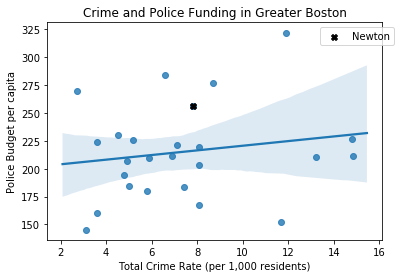

In [29]:
# sns.scatterplot(data=df,x='Total Crime Rate (per 1,000 residents)',y='Police Budget per capita',hue='name') 
sns.regplot(data=df,
            x='Total Crime Rate (per 1,000 residents)',
            y='Police Budget per capita')
plt.scatter(df.loc['Newton, MA',:]['Total Crime Rate (per 1,000 residents)'],
            df.loc['Newton, MA',:]['Police Budget per capita'],
            marker='X',
            color='k',
            label='Newton')
plt.title('Crime and Police Funding in Greater Boston')
plt.legend(bbox_to_anchor = [1.05,1.0])
plt.savefig(FP_PLOT_OUT)
